In [19]:
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [20]:
import pandas as pd

In [21]:
import glob

In [22]:
golfregimes = ['hs0_4_1lsm_2uur','hs0_6_5lsm_2uur','hs0_8_10lsm_2uur','hs1_2_25lsm_2uur','hs1_4_50lsm_2uur']
locaties = ['kruin','helling']

In [23]:
def getDF(golfregime, parameter, locatie, hoogte):
    golf_afgeleiden =  (glob.glob(r'D:\Projects\Pr\3517.10\Werkfolder\2017-09-07_tijdreeksen\afgeleiden//*'+golfregime+'*'))
    matching_locatie = [s for s in golf_afgeleiden if locatie in s]
    if parameter == 'Laagdikte':
        laagdikte_matching_parameter = [s for s in matching_locatie if parameter in s]
        df = pd.read_csv(laagdikte_matching_parameter[0])
    if parameter == 'snelheid':
        snelheid_matching_parameter = [s for s in matching_locatie if parameter in s]
        snelheid_matching_hoogte = [s for s in snelheid_matching_parameter if hoogte in s]        
        df = pd.read_csv(snelheid_matching_hoogte[0])
    return df

In [24]:
for golfregime in tqdm(golfregimes):
    for locatie in tqdm(locaties):
        if locatie == 'kruin':
            df_laagdikte = getDF(golfregime, 'Laagdikte', locatie, 'nan')
            df_snelheid_oppervlakte = getDF(golfregime, 'snelheid', locatie, 'oppervlakte')
            df_snelheid_bodem = getDF(golfregime, 'snelheid', locatie, 'bodem')
            
            debiet_bodem = pd.Series(df_snelheid_bodem.iloc[:,-1] * df_laagdikte.iloc[:,-1], name='debiet_bodem (m3/s)')
            debiet_bodem = pd.concat((df_snelheid_bodem.iloc[:,0],debiet_bodem),axis=1)            
            debiet_bodem.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-09-07_tijdreeksen\afgeleiden/debiet_bodem'+locatie+'_'+golfregime+'.csv', header=True)
            
            debiet_oppervlakte = pd.Series(df_snelheid_oppervlakte.iloc[:,-1] * df_laagdikte.iloc[:,-1], name='debiet_oppervlakte (m3/s)')
            debiet_oppervlakte = pd.concat((df_snelheid_oppervlakte.iloc[:,0],debiet_oppervlakte),axis=1)
            debiet_oppervlakte.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-09-07_tijdreeksen\afgeleiden/debiet_oppervlakte_'+locatie+'_'+golfregime+'.csv', header=True)            
        if locatie == 'helling':
            df_laagdikte = getDF(golfregime, 'Laagdikte', locatie, 'nan')
            df_snelheid_bodem = getDF(golfregime, 'snelheid', locatie, 'bodem')
            
            debiet_bodem = pd.Series(df_snelheid_bodem.iloc[:,-1] * df_laagdikte.iloc[:,-1], name='debiet_bodem (m3/s)')
            debiet_bodem = pd.concat((df_snelheid_bodem.iloc[:,0],debiet_bodem),axis=1)            
            debiet_bodem.to_csv(r'D:\Projects\Pr\3517.10\Werkfolder\2017-09-07_tijdreeksen\afgeleiden/debiet_bodem_'+locatie+'_'+golfregime+'.csv', header=True)            

100%|████████████████████████████████████████████| 5/5 [01:28<00:00, 18.88s/it]


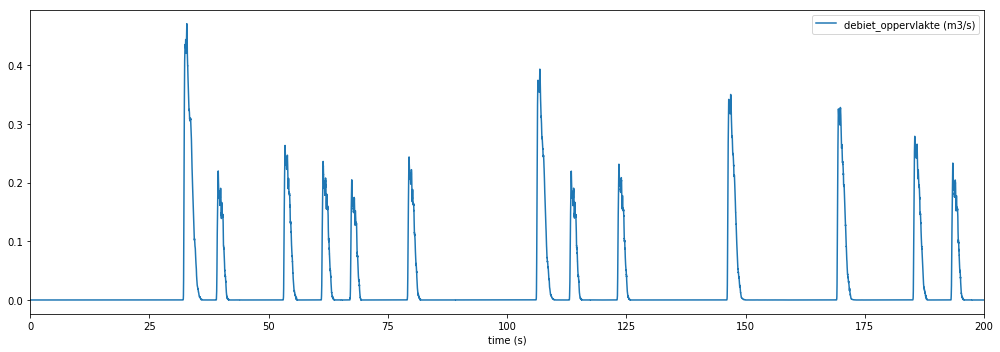

In [25]:
# figure op basis van golf 500 - 3500
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,5))
debiet_oppervlakte.set_index('time (s)').loc[0:200].plot(ax=ax)
plt.tight_layout()

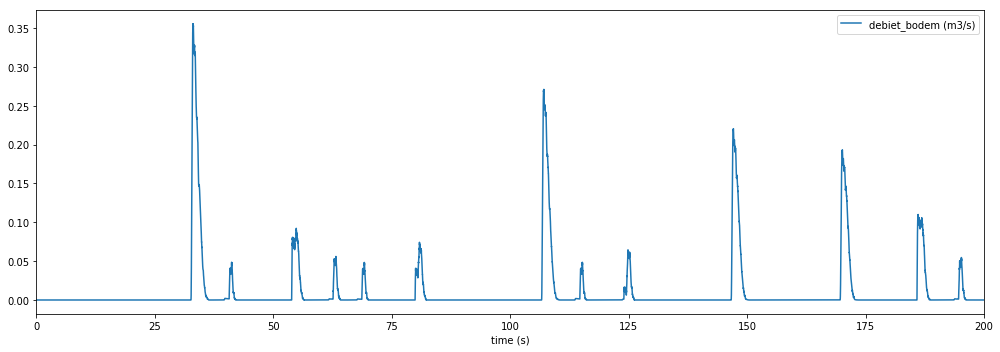

In [10]:
# figure op basis van golf 500 - 3500
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(14,5))
debiet_bodem.set_index('time (s)').loc[0:200].plot(ax=ax)
plt.tight_layout()